# Data import

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mfrl_lib.lib import *

# Function to load data
def load_data(filename):
    return pd.read_csv(filename)

# Function to compute CDF
def compute_cdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y

# Load data for each mode
timestamp = "20240827_215325"
# modes = ["RA2C", "RA2C_fed", "A2C", "recurrent", "fixedprob", "vanilla"]
modes = ["RA2C", "RA2C_fed", "RA2Cfull", "A2C", "fixedprob", "vanilla"]
dataframes = {}

for mode in modes:
    filename = f"test_log_{mode}_{topo_string}_{timestamp}.csv"
    dataframes[mode] = load_data(filename)
    
# Set the style for the plot
sns.set_theme(style="whitegrid")
sns.set_palette("husl")
colors = sns.color_palette("husl", len(modes))

# Simple statistics

Text(0, 0.5, 'Max AoI value')

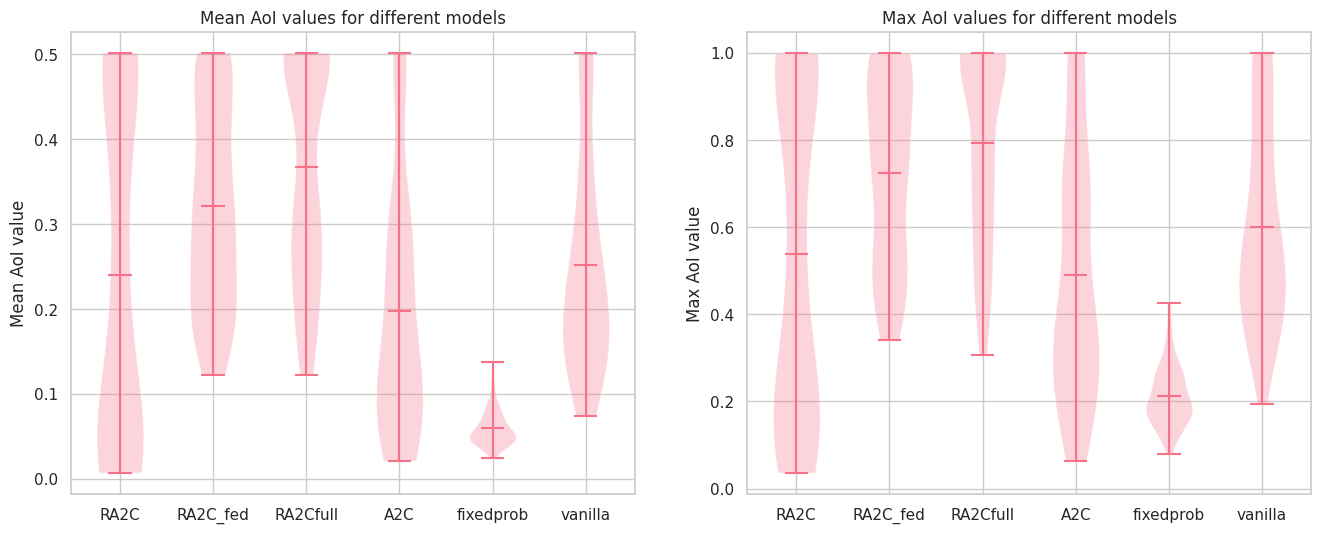

In [3]:
dataframes_power = {}
dataframes_max = {}

for mode in modes:
    df = dataframes[mode]
    # index: episode, value: mean aoi values
    dataframes_power[mode] = pd.DataFrame()
    dataframes_max[mode] = pd.DataFrame()
    for i in range(10):
        dataframes_power[mode] = pd.concat([dataframes_power[mode], df[df["episode"] == i][[f"aoi_{j}" for j in range(8)]].mean()])
        dataframes_max[mode] = pd.concat([dataframes_max[mode], df[df["episode"] == i][[f"aoi_{j}" for j in range(8)]].max()])
        
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax.violinplot([dataframes_power[mode].squeeze() for mode in modes], showmeans=True)
ax.set_title("Mean AoI values for different models")
ax.set_xticks(np.arange(1, len(modes)+1))
ax.set_xticklabels([f"{mode}" for mode in modes])
ax.set_ylabel("Mean AoI value")

ax2.violinplot([dataframes_max[mode].squeeze() for mode in modes], showmeans=True)
ax2.set_title("Max AoI values for different models")
ax2.set_xticks(np.arange(1, len(modes)+1))
ax2.set_xticklabels([f"{mode}" for mode in modes])
ax2.set_ylabel("Max AoI value")

Text(0, 0.5, 'Mean action value')

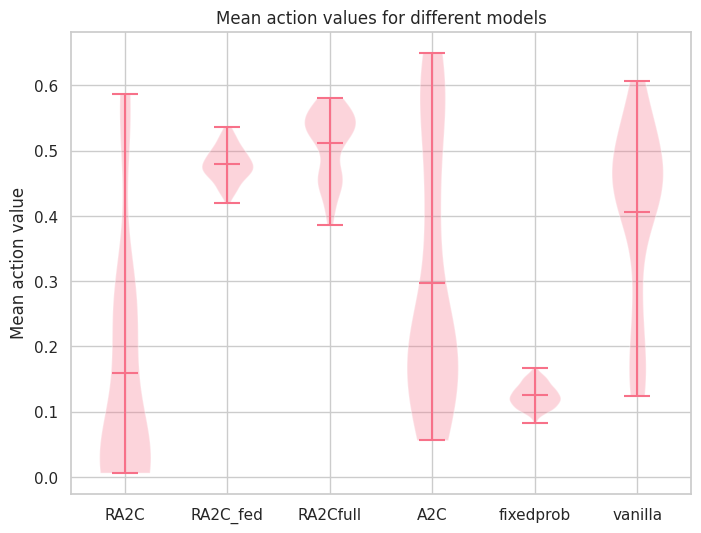

In [4]:
dataframes_power = {}

for mode in modes:
    df = dataframes[mode]
    dataframes_power[mode] = pd.DataFrame()
    for i in range(10):
        dataframes_power[mode] = pd.concat([dataframes_power[mode], df[df["episode"] == i][[f"action_{j}" for j in range(8)]].mean()])
        
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.violinplot([dataframes_power[mode].squeeze() for mode in modes], showmeans=True)
ax.set_title("Mean action values for different models")
ax.set_xticks(np.arange(1, len(modes)+1))
ax.set_xticklabels([f"{mode}" for mode in modes])
ax.set_ylabel("Mean action value")


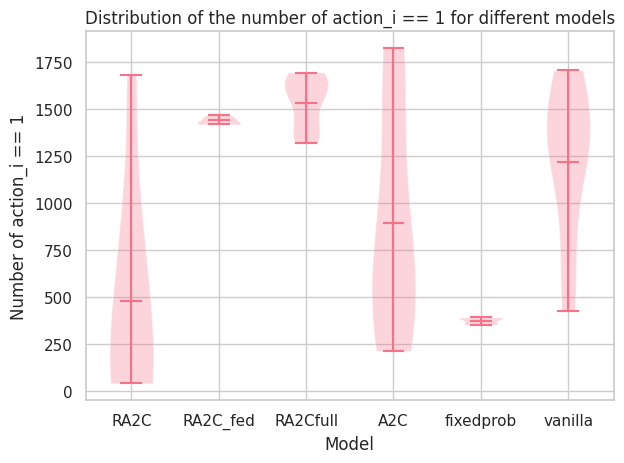

In [6]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
action_columns = [f'action_{i}' for i in range(8)]
fig, ax = plt.subplots()
# Draw the violinplot for the number of action_i == 1
violin = ax.violinplot([dataframes[mode][action_columns].apply(lambda x: (x == 1).sum(), axis=0) for mode in modes],
                            showmeans=True)
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Model")
plt.ylabel("Number of action_i == 1")
plt.title("Distribution of the number of action_i == 1 for different models")
plt.xticks([1, 2, 3, 4, 5, 6], modes)
plt.tight_layout()
plt.show()

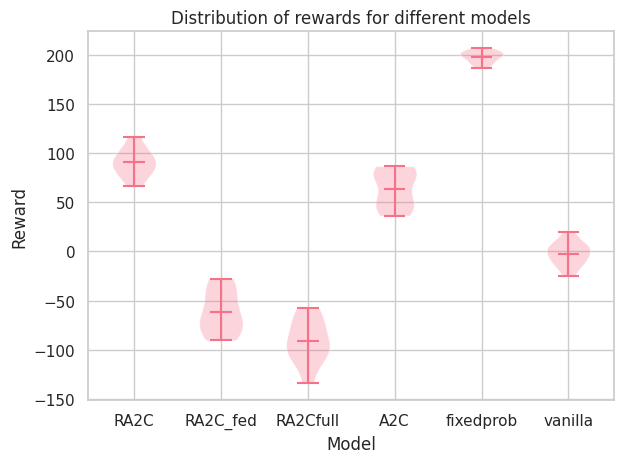

In [7]:
fig, ax = plt.subplots()
# Draw the violinplot only when the epoch is 299.
violin = ax.violinplot([dataframes[mode]["reward"][dataframes[mode]["epoch"]==299] for mode in modes],
                       showmeans=True)
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Model")
plt.ylabel("Reward")
plt.title("Distribution of rewards for different models")
plt.xticks([1, 2, 3, 4, 5, 6], modes)
plt.tight_layout()
plt.show()

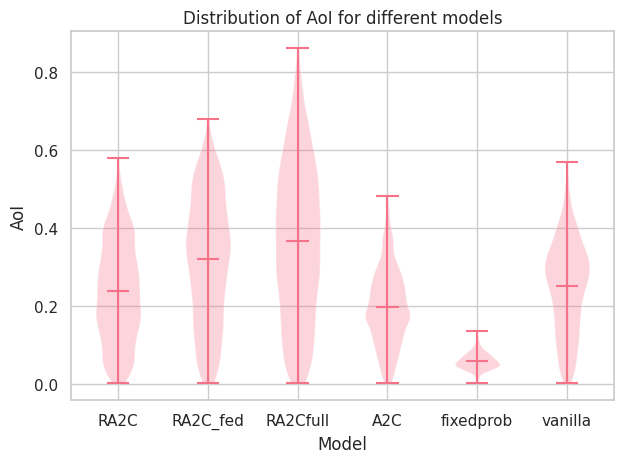

In [8]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
aoi_columns = [f'aoi_{i}' for i in range(8)]
fig, ax = plt.subplots()
# Draw the violinplot for AoI values
violin = ax.violinplot([dataframes[mode][aoi_columns].mean(axis=1) for mode in modes],
                          showmeans=True)
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Model")
plt.ylabel("AoI")
plt.title("Distribution of AoI for different models")
plt.xticks([1, 2, 3, 4, 5, 6], modes)
plt.tight_layout()
plt.show()

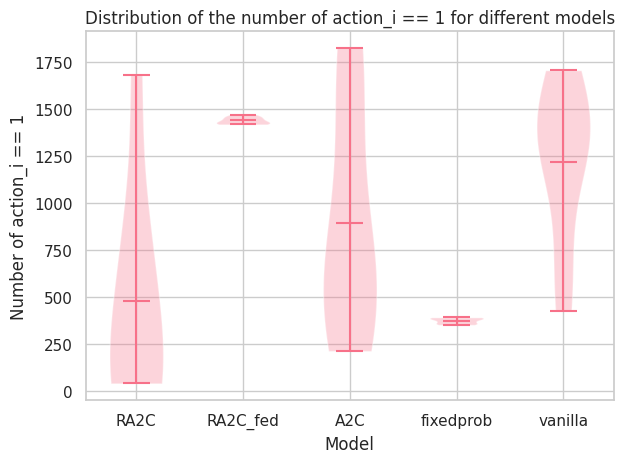

In [33]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
action_columns = [f'action_{i}' for i in range(8)]
fig, ax = plt.subplots()
# Draw the violinplot for the number of action_i == 1
violin = ax.violinplot([dataframes[mode][action_columns].apply(lambda x: (x == 1).sum(), axis=0) for mode in modes],
                            showmeans=True)
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Model")
plt.ylabel("Number of action_i == 1")
plt.title("Distribution of the number of action_i == 1 for different models")
plt.xticks([1, 2, 3, 4, 5], modes)
plt.tight_layout()
plt.show()

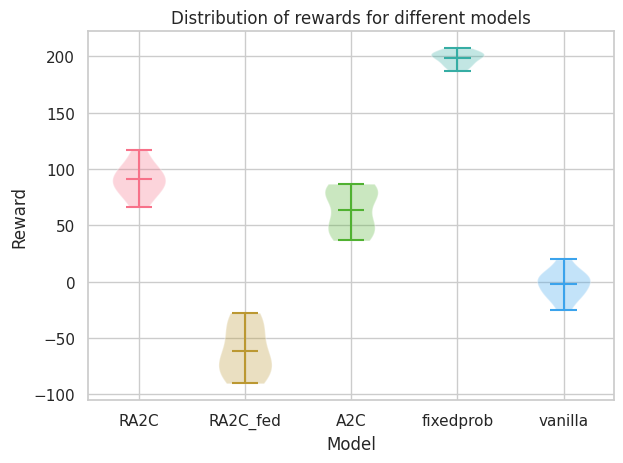

In [34]:
fig, ax = plt.subplots()
# Draw the violinplot only when the epoch is 299.
for i, mode in enumerate(modes):
    violin = ax.violinplot(dataframes[mode]["reward"][dataframes[mode]["epoch"]==299], positions=[i], showmeans=True)
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Model")
plt.ylabel("Reward")
plt.title("Distribution of rewards for different models")
plt.xticks([0, 1, 2, 3, 4], modes)
plt.tight_layout()
plt.show()

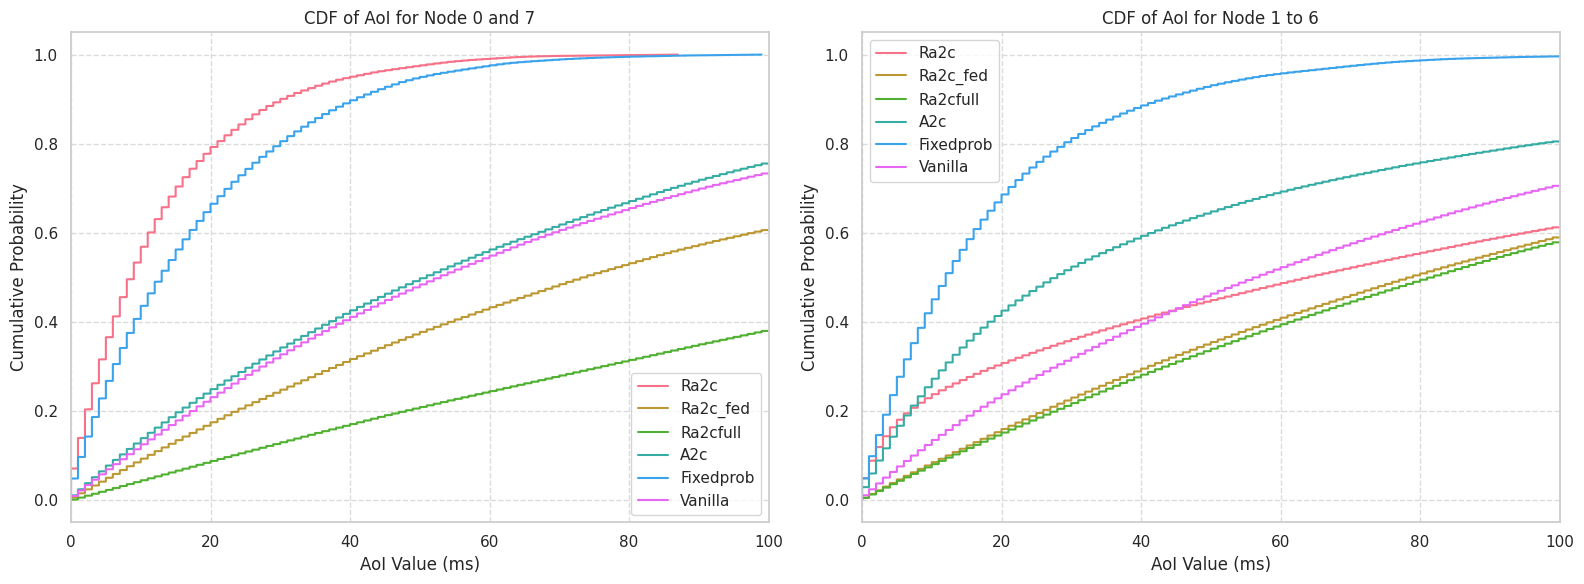

In [9]:
# Function to compute CDF
def compute_cdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y

# Params
x_lim = 100

# Create CDF plots
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i, mode in enumerate(modes):
    df = dataframes[mode]
    
    # CDF for aoi_0
    x0, y0 = compute_cdf(pd.concat([df['aoi_0'], df['aoi_7']]))
    ax.plot(x0*300, y0, label=mode.capitalize(), color=colors[i])
    
    # CDF for aoi_1
    x1, y1 = compute_cdf(pd.concat([df[f'aoi_{i}'] for i in range(1, 7)]))
    ax2.plot(x1*300, y1, label=mode.capitalize(), color=colors[i])

# Customize the first subplot (aoi_0)
ax.set_xlabel('AoI Value (ms)')
ax.set_ylabel('Cumulative Probability')
ax.set_title('CDF of AoI for Node 0 and 7')
ax.legend()
ax.set_xlim([0, x_lim])
ax.grid(True, linestyle='--', alpha=0.7)

# Customize the second subplot (aoi_1)
ax2.set_xlabel('AoI Value (ms)')
ax2.set_ylabel('Cumulative Probability')
ax2.set_title('CDF of AoI for Node 1 to 6')
ax2.legend()
ax2.set_xlim([0, x_lim])
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

In [10]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
action_columns = [f'action_{i}' for i in range(8)]

for i, mode in enumerate(modes):
    df = dataframes[mode]
    print(f"Mode: {mode}")
    print(f"Avg. number of tx actions of all agents: {df[action_columns].to_numpy().sum()/10}")
    

Mode: RA2C
Avg. number of tx actions of all agents: 381.3
Mode: RA2C_fed
Avg. number of tx actions of all agents: 1150.7
Mode: RA2Cfull
Avg. number of tx actions of all agents: 1226.8
Mode: A2C
Avg. number of tx actions of all agents: 714.8
Mode: fixedprob
Avg. number of tx actions of all agents: 300.2
Mode: vanilla
Avg. number of tx actions of all agents: 975.0


In [11]:
# Print action distributions per agent 0 to 7 for each mode
for mode in modes:
    df = dataframes[mode]
    print(f"")
    print(f"Mode: {mode}")
    for i in range(8):
        print(f"Agent {i}: {df[f'action_{i}'].mean():.3f}", end=" ")


Mode: RA2C
Agent 0: 0.241 Agent 1: 0.014 Agent 2: 0.021 Agent 3: 0.123 Agent 4: 0.018 Agent 5: 0.560 Agent 6: 0.015 Agent 7: 0.279 
Mode: RA2C_fed
Agent 0: 0.473 Agent 1: 0.486 Agent 2: 0.478 Agent 3: 0.473 Agent 4: 0.473 Agent 5: 0.479 Agent 6: 0.490 Agent 7: 0.485 
Mode: RA2Cfull
Agent 0: 0.544 Agent 1: 0.541 Agent 2: 0.440 Agent 3: 0.564 Agent 4: 0.455 Agent 5: 0.541 Agent 6: 0.536 Agent 7: 0.468 
Mode: A2C
Agent 0: 0.186 Agent 1: 0.219 Agent 2: 0.576 Agent 3: 0.403 Agent 4: 0.117 Agent 5: 0.071 Agent 6: 0.608 Agent 7: 0.203 
Mode: fixedprob
Agent 0: 0.131 Agent 1: 0.118 Agent 2: 0.119 Agent 3: 0.129 Agent 4: 0.125 Agent 5: 0.129 Agent 6: 0.131 Agent 7: 0.120 
Mode: vanilla
Agent 0: 0.242 Agent 1: 0.445 Agent 2: 0.449 Agent 3: 0.142 Agent 4: 0.568 Agent 5: 0.426 Agent 6: 0.517 Agent 7: 0.460 

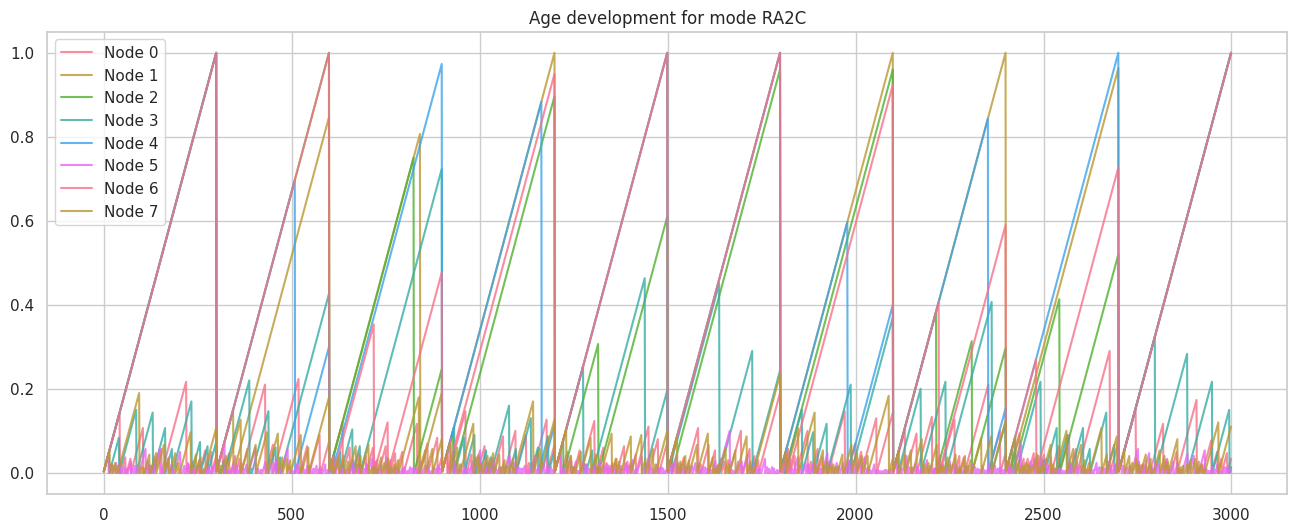

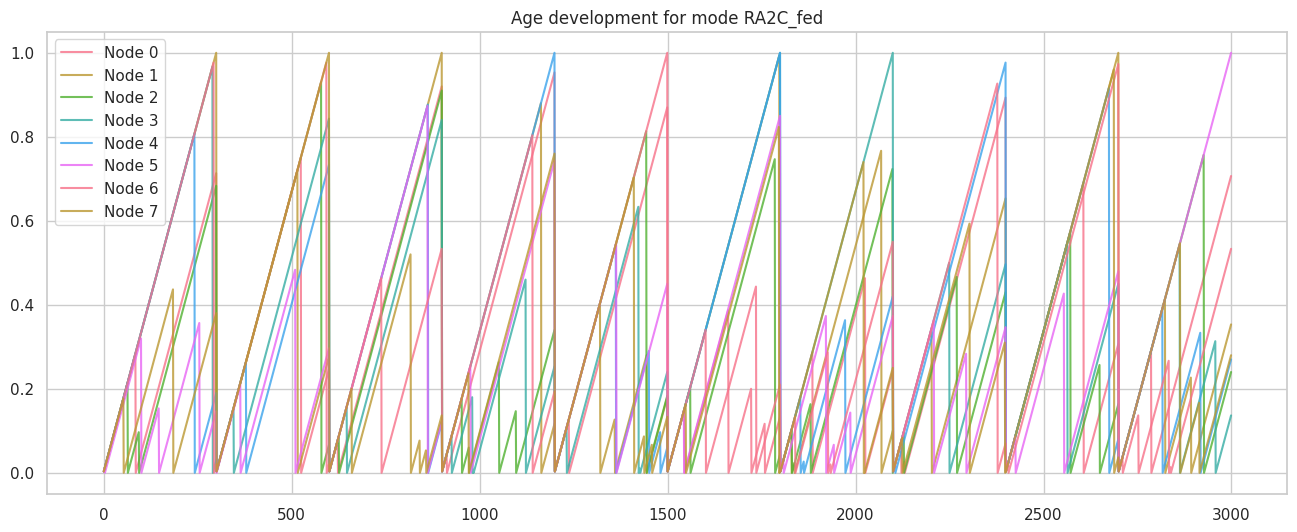

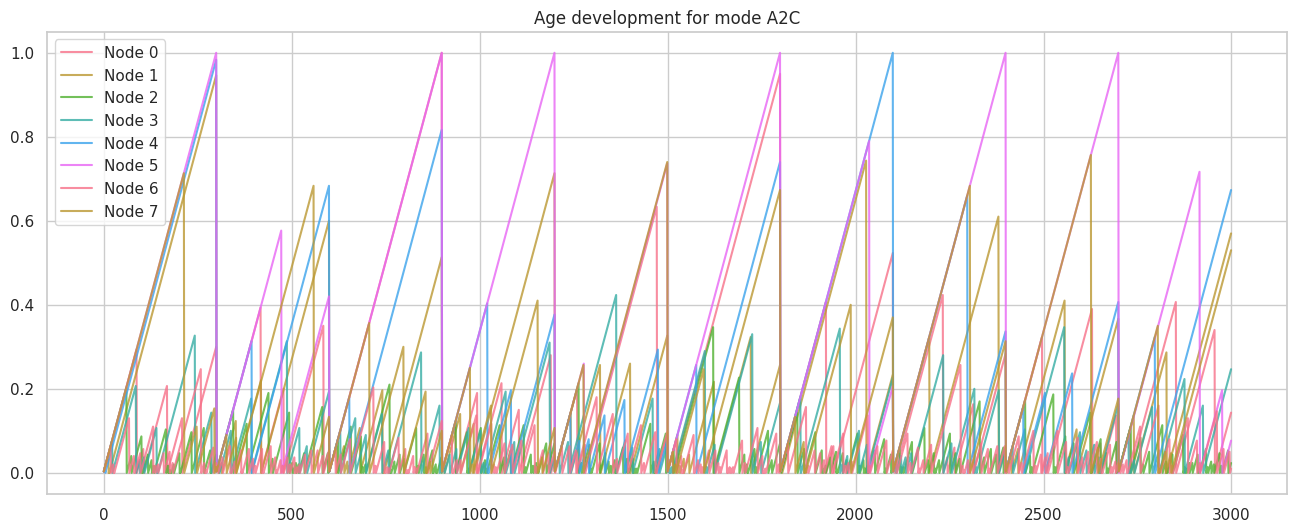

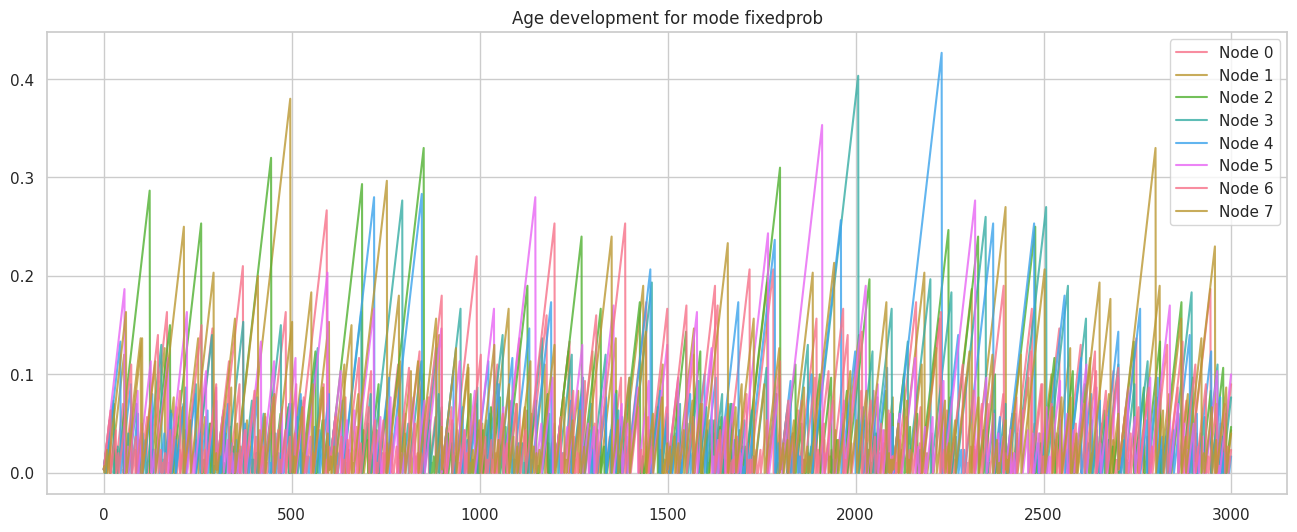

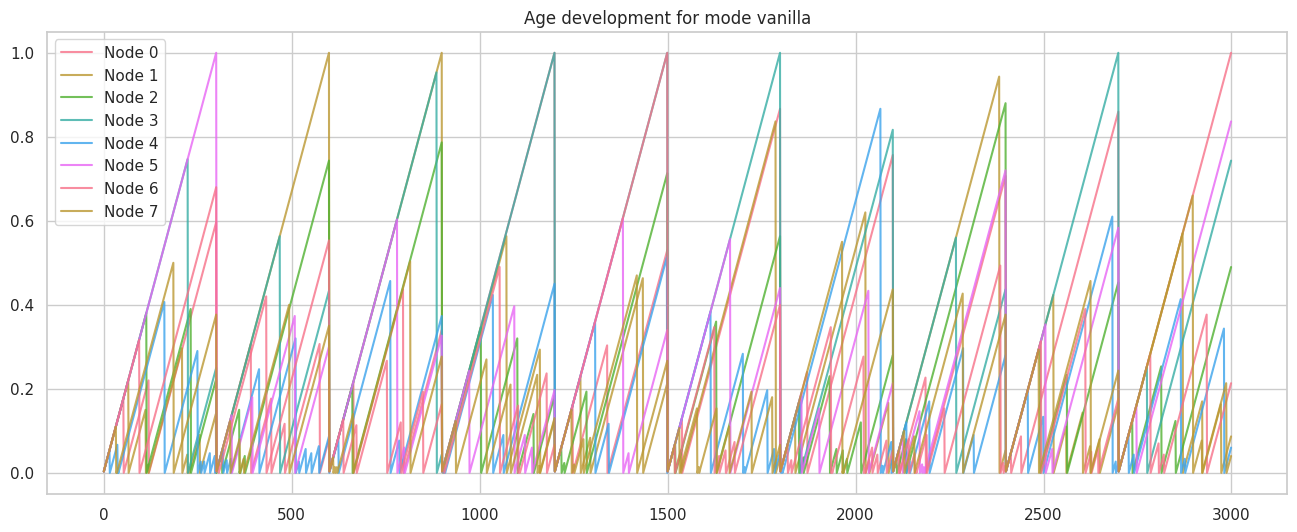

In [38]:
# Plot the age development for each mode
for mode in modes:
    plt.subplots(1, 1, figsize=(16, 6))
    df = dataframes[mode]
    
    plt.plot(df[[f'aoi_{i}' for i in range(0, 8)]], alpha=0.8)
    plt.title(f"Age development for mode {mode}")
    plt.legend([f'Node {i}' for i in range(0, 8)])